<a href="https://colab.research.google.com/github/siddheshdhavale/Data_Science_NBC/blob/main/Siddhesh_Dhavale_NBC_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
!pip install google_play_scraper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import reviews_all, Sort

app_id = 'com.myfitnesspal.android'
reviews = []
count = 0

while count < 10000:
    # Request new reviews starting from the last review ID already collected
    new_reviews = reviews_all(
        app_id,
        sleep_milliseconds=0,
        lang='chi',
        country='us',
        sort=Sort.NEWEST,
        count=500,  # Request 500 reviews per iteration
        filter_score_with=1  # Only collect 1-star reviews
    )
    if len(new_reviews) == 0:
        break  # Stop the loop if there are no more reviews to scrape
    reviews.extend(new_reviews)
    count += len(new_reviews)
    print(f"Collected {count} reviews")

print(f"Total reviews collected: {len(reviews)}")


Collected 42639 reviews
Total reviews collected: 42639


In [ ]:
# Define and configure Google Play Scraper library
hk_users_reviews = reviews_all(
    'com.myfitnesspal.android',
    sleep_milliseconds=0,
    lang='chi', # Default language is 'en', set language to Chinese.
    country='us', # Default country is 'us', set country to Hong Kong.
    sort=Sort.NEWEST, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(hk_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2184769d-97f6-46be-b84f-b675c78efde3,Kassie Lee,https://play-lh.googleusercontent.com/a/AGNmyx...,$20/month for premium?!? Are you kidding me? N...,1,0,23.7.0,2023-04-12 16:34:56,Hi Kassie! Thank you for providing this feedba...,2023-04-12 17:16:30
1,9c77766e-114a-4d1c-afac-826c4287d460,Zachary Johnson-Dunlop,https://play-lh.googleusercontent.com/a/AGNmyx...,I used the unpaid version. You can't edit or s...,1,0,23.7.0,2023-04-12 16:02:53,"Hi Zachary, our apologies for any problems you...",2023-04-12 17:15:50
2,20fa1d9e-94d6-4d82-aa23-c52b6ac89ec5,Brian,https://play-lh.googleusercontent.com/a/AGNmyx...,Used t be free bt now it's pay for everything.,3,0,23.6.0,2023-04-12 15:52:32,Hi Brian! We do apologize for the confusion. T...,2023-04-12 17:15:20
3,ebebd401-ce30-41bf-aab5-62450058d69b,V S,https://play-lh.googleusercontent.com/a/AGNmyx...,I love it. it helped me lose 20 lbs and tracks...,5,0,23.5.0,2023-04-12 15:30:30,"Thank you for your review of MyFitnessPal, we ...",2023-04-12 17:14:35
4,35011d11-642c-48cd-b479-ea919d55ac27,Taylor Jones,https://play-lh.googleusercontent.com/a/AGNmyx...,With the help of the workout and meal tracking...,5,0,23.6.0,2023-04-12 15:16:34,"Hi Taylor, we are thrilled to hear you have be...",2023-04-12 17:14:19


In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15920 entries, 0 to 15919
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              15920 non-null  object        
 1   userName              15920 non-null  object        
 2   userImage             15920 non-null  object        
 3   content               15920 non-null  object        
 4   score                 15920 non-null  int64         
 5   thumbsUpCount         15920 non-null  int64         
 6   reviewCreatedVersion  14107 non-null  object        
 7   at                    15920 non-null  datetime64[ns]
 8   replyContent          14801 non-null  object        
 9   repliedAt             14801 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 1.2+ MB


In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

1    9553
2    2367
5    1963
3    1255
4     782
Name: score, dtype: int64

<Axes: ylabel='score'>

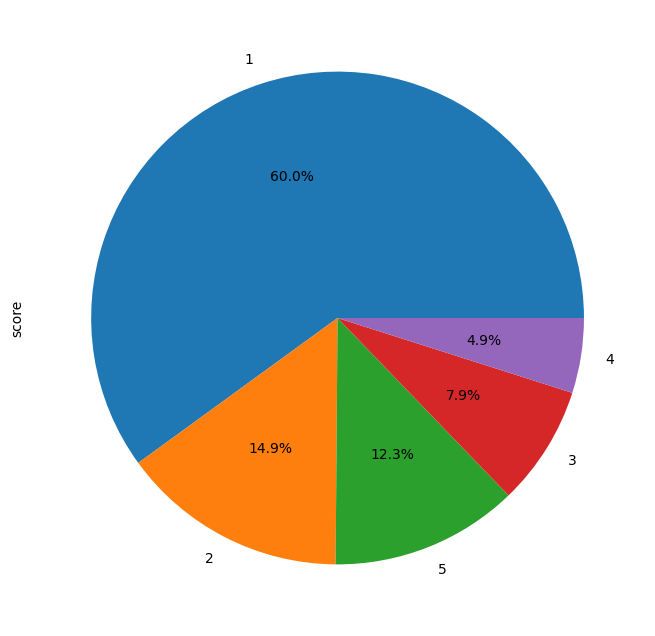

In [ ]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head(15)

,content,score
0,$20/month for premium?!? Are you kidding me? N...,1
1,I used the unpaid version. You can't edit or s...,1
2,Used t be free bt now it's pay for everything.,3
3,I love it. it helped me lose 20 lbs and tracks...,5
4,With the help of the workout and meal tracking...,5
5,very good app for tracking calories,4
6,I have canceled and keep getting charged.,1
7,"Edit: not sure if the problem below was fixed,...",5
8,The net carbs tracking is WILDLY inaccurate so...,1
9,Had to change from a 5 to a 1. Too many adds n...,1


In [ ]:
# # Define and configure Google Play Scraper library
# # app_package_name = 'com.google.android.youtube'
# app_package_name = 'com.aiahk.idirect'
# reviews = reviews_all(
#     app_package_name,
#     sleep_milliseconds=0,
# #     lang='en',
#     country='us',
#     sort=Sort.NEWEST,
#     count=1
# )


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# # Convert collected reviews data into dataframe
# df_reviews = pd.DataFrame(reviews)

# Label reviews as positive or negative based on rating
df_reviews['label'] = np.where(df_reviews['score'].isin([1,2]), 'negative', 'positive')

# Apply tokenization and stemming to review text
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
df_reviews['tokens'] = df_reviews['content'].apply(lambda x: [stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words])

# Split data into training and testing sets
X = df_reviews['tokens']
y = df_reviews['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create bag-of-words representation for training data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train.apply(lambda x: ' '.join(x)))

# Train an NBC classifier on the training data
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

# Evaluate performance on the testing data
X_test_bow = cv.transform(X_test.apply(lambda x: ' '.join(x)))
y_pred = nb.predict(X_test_bow)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


# Train a Naive Bayes Classifier on the training data
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = clf.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Confusion Matrix:
 [[2212  179]
 [ 339  454]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.93      0.90      2391
    positive       0.72      0.57      0.64       793

    accuracy                           0.84      3184
   macro avg       0.79      0.75      0.77      3184
weighted avg       0.83      0.84      0.83      3184

Accuracy: 0.8373115577889447
Precision: 0.717219589257504
Recall: 0.5725094577553594
F1 score: 0.6367461430575035


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


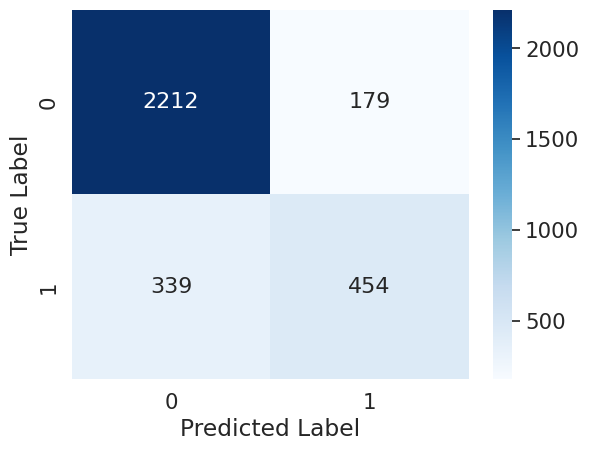

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Extra

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_bow, y_train)
y_pred = svm.predict(X_test_bow)
print('SVM Classifier:\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)
print('Random Forest Classifier:\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


SVM Classifier:

Confusion Matrix:
 [[49  6]
 [10 12]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.89      0.86        55
    positive       0.67      0.55      0.60        22

    accuracy                           0.79        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.78      0.79      0.79        77

Random Forest Classifier:

Confusion Matrix:
 [[49  6]
 [ 9 13]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.89      0.87        55
    positive       0.68      0.59      0.63        22

    accuracy                           0.81        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.80      0.81      0.80        77



In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_reviews['tokens'] = df_reviews['content'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words])

# Removing rare words
cv = CountVectorizer(min_df=5)
X_train_bow = cv.fit_transform(X_train.apply(lambda x: ' '.join(x)))

# Using a different stopword list
custom_stop_words = set(stopwords.words('english')).union({'one', 'two', 'even', 'get', 'go', 'make', 'come', 'much'})
df_reviews['tokens'] = df_reviews['content'].apply(lambda x: [stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in custom_stop_words])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train.apply(lambda x: ' '.join(x)))
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
X_test_tfidf = tfidf.transform(X_test.apply(lambda x: ' '.join(x)))
y_pred = nb.predict(X_test_tfidf)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[54  1]
 [14  8]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.98      0.88        55
    positive       0.89      0.36      0.52        22

    accuracy                           0.81        77
   macro avg       0.84      0.67      0.70        77
weighted avg       0.82      0.81      0.77        77

